In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [37]:
cola=pd.read_csv('/content/CocaCola_Sales_Rawdata.csv')

In [38]:
cola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


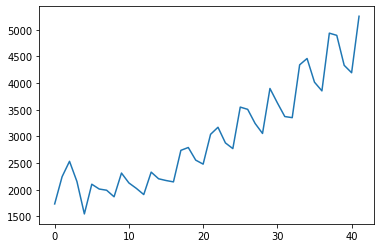

In [39]:
cola.Sales.plot()

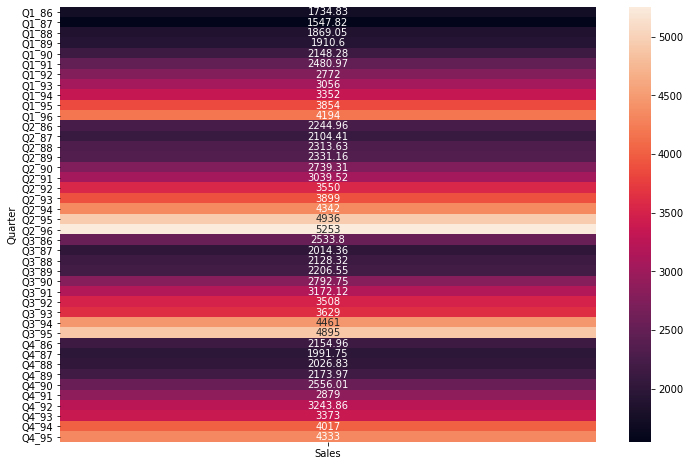

In [40]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=cola,values="Sales",index="Quarter",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


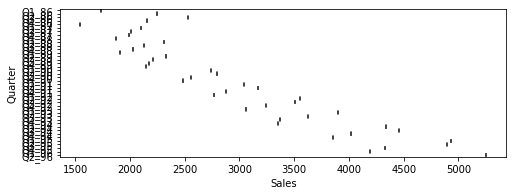

In [41]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Sales",y="Quarter",data=cola)


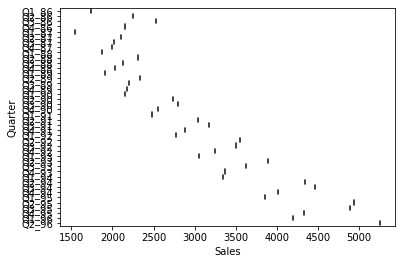

In [42]:
# Boxplot for ever
sns.boxplot(x="Sales",y="Quarter",data=cola)

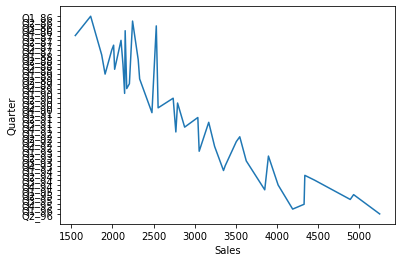

In [43]:
# Line plot for Ridership based on year  and for each month
sns.lineplot(x="Sales",y="Quarter",data=cola)

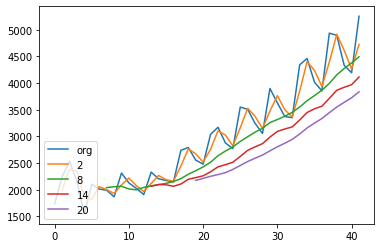

In [44]:
# moving average for the time series to understand better about the trend character in Amtrak
cola.Sales.plot(label="org")
for i in range(2,24,6):
    cola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)
    

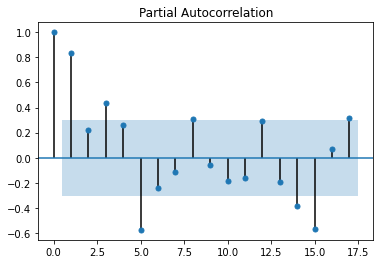

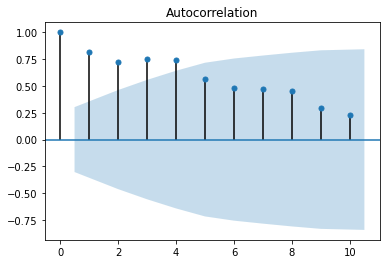

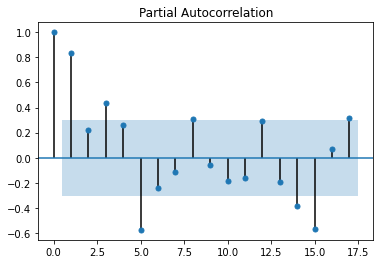

In [45]:
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(cola.Sales,lags=10)
tsa_plots.plot_pacf(cola.Sales)


In [46]:
cola.index.freq = "MS"

In [47]:
Train = cola.head(133)
Test = cola.tail(12)

In [48]:
Test.set_index(np.arange(1,13),inplace=True)


In [49]:
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)



In [50]:
#SEM
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 


50.4127102753017

In [51]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

49.30898273763163

In [52]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.


48.84081480590211

In [53]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.


49.06544925357082

In [54]:
from pmdarima import auto_arima
auto_arima_model = auto_arima(Train["Sales"],start_p=0,
                              start_q=0,max_p=10,max_q=10,
                              m=12,start_P=0,seasonal=True,
                              d=1,D=1,trace=True,error_action="ignore",
                              suppress_warnings= True,
                              stepwise=False)
                

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=402.446, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=404.444, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=406.375, Time=0.44 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=404.443, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=406.441, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=nan sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=408.374, Time=0.4

In [27]:
!pip install pmdarima

In [55]:
auto_arima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   42
Model:             SARIMAX(4, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -194.474
Date:                            Mon, 07 Jun 2021   AIC                            400.949
Time:                                    14:22:03   BIC                            409.152
Sample:                                         0   HQIC                           403.518
                                             - 42                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1238      0.169      0.731      0.465      -0.208       0.456
ar.L2         -0.3922      0.197     -1.993      0.046      -0.778      -0.007
ar.L3          0.0167      0.146      0.114      0.909      -0.269       0.302
ar.L4          0.4496      0.227      1.979      0.048       0.004       0.895
ar.S.L12      -0.6293      0.191     -3.298      0.001      -1.003      -0.255
sigma2      2.925e+04   1.19e+04      2.465      0.014    5988.369    5.25e+04
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.49
Prob(Q):                               nan   Prob(JB):                         0.78
Heteroskedasticity (H):               0.50   Skew:                             0.01
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
# For getting Fitted values for train data set we use 
# predict_in_sample() function 
auto_arima_model.predict_in_sample( )


array([   0.        , 1739.98595648, 2217.4903774 , 2513.52520945,
       2169.84550374, 1580.53376383, 2128.33982364, 1972.35446413,
       1964.15442342, 1895.59301841, 2340.15448466, 2099.81446149,
       2881.93544347, 2415.24468734, 2676.35054559, 1820.50717292,
       1793.53757203, 2621.63889894, 2313.19652222, 2885.03993389,
       2561.86243178, 3050.14297158, 2979.28848855, 2897.79576869,
       2587.6233347 , 3318.43810468, 3713.61055872, 3066.64070818,
       3004.73670036, 3788.35885139, 3736.04945749, 3388.05585225,
       3436.50916426, 4028.7963876 , 4196.49361485, 4046.35830523,
       3843.6002977 , 4736.6740628 , 5006.51712516, 4452.77769526,
       4157.71764128, 5284.54129047])

In [57]:
# For getting predictions for future we use predict() function 
pred_test = pd.Series(auto_arima_model.predict(n_periods=12))
# Adding the index values of Test Data set to predictions of Auto Arima
pred_test.index = Test.index
MAPE(pred_test,Test.Sales) 

29.787336805086852

In [63]:
# Using Sarimax from statsmodels 
# As we do not have automatic function in indetifying the 
# best p,d,q combination 
# iterate over multiple combinations and return the best the combination
# For sarimax we require p,d,q and P,D,Q 
combinations_l = list((range(1,7),range(2),range(1,7)))
 


In [64]:
combinations_u = list((range(1,7),range(2),range(1,7)))
m =12

In [65]:
results_sarima = []
best_aic = float("inf")


In [66]:
for i in combinations_l:
    for j in combinations_u:
        try:
            model_sarima = sm.tsa.statespace.SARIMAX(Train["Sales"],
                                                     order = i,seasonal_order = j+(m,)).fit(disp=-1)
        except:
            continue
        aic = model_sarima.aic
        if aic < best_aic:
            best_model = model_sarima
            best_aic = aic
            best_l = i
            best_u = j
        results_sarima.append([i,j,model_sarima.aic])



In [67]:
result_sarima_table = pd.DataFrame(results_sarima)

In [72]:
best_fit_model = sm.tsa.statespace.SARIMAX(Train["Sales"],
                                                     order = (1,1,1),seasonal_order = (1,1,1,6)).fit(disp=-1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  


In [73]:
best_fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                   42
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -247.035
Date:                           Mon, 07 Jun 2021   AIC                            504.069
Time:                                   14:34:19   BIC                            511.846
Sample:                                        0   HQIC                           506.754
                                            - 42                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9972      8.704      0.115      0.909     -16.062      18.057
ma.L1         -0.9958      9.520     -0.105      0.917     -19.655      17.664
ar.S.L6       -0.9524      0.057    -16.617      0.000      -1.065      -0.840
ma.S.L6       -0.2727      0.216     -1.262      0.207      -0.696       0.151
sigma2        5.4e+04    4.2e+04      1.284      0.199   -2.84e+04    1.36e+05
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 1.20
Prob(Q):                               nan   Prob(JB):                         0.55
Heteroskedasticity (H):               0.76   Skew:                             0.35
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
best_fit_model.aic 

504.0694755581618

In [75]:
srma_pred = best_fit_model.predict(start = Test.index[0],end = Test.index[-1])

In [76]:
cola["srma_pred"] = srma_pred


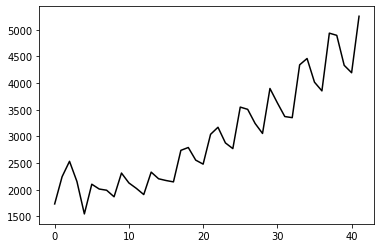

In [77]:
plt.plot(Train.index, Train["Sales"], label='Train',color="black")

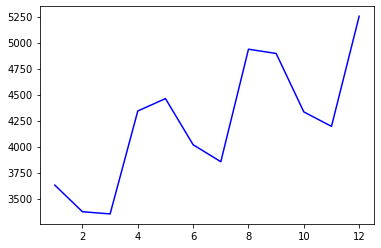

In [78]:
# Visualization of Forecasted values for Test data set using different methods
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")

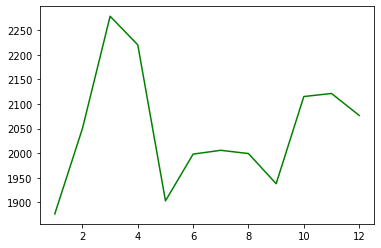

In [79]:
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")

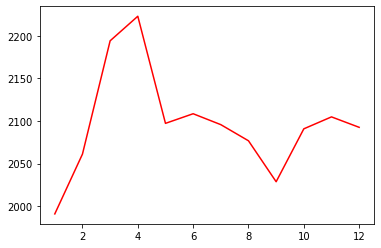

In [80]:
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")

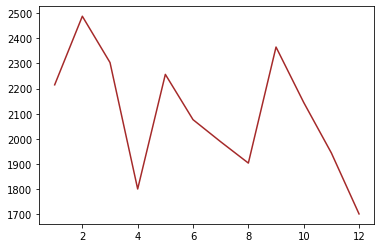

In [81]:
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")

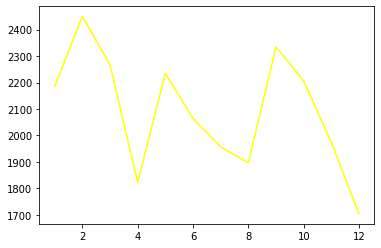

In [82]:
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")

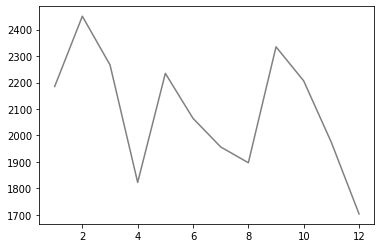

In [83]:
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="Auto_Arima",color="grey")

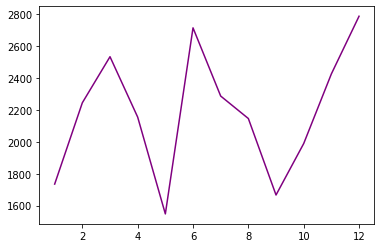

In [84]:
plt.plot(pred_hwe_mul_add.index,srma_pred,label="Auto_Sarima",color="purple")

No handles with labels found to put in legend.


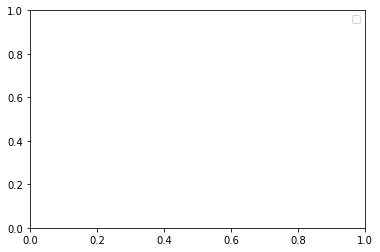

In [85]:
plt.legend(loc='best')


In [86]:
# Models and their MAPE values
model_mapes = pd.DataFrame(columns=["model_name","mape"])

In [90]:
model_mapes["model_name"] = [" "]
# Visualizing the ACF and PACF plots for errors ""

In [91]:
model_mapes["model_name"]

0     
Name: model_name, dtype: object

In [93]:
quarter =['Q1','Q2','Q3','Q4']

In [95]:
p =cola["Quarter"][0:4]


In [96]:
p

0    Q1_86
1    Q2_86
2    Q3_86
3    Q4_86
Name: Quarter, dtype: object

In [97]:
cola["Quarter"][0:4]

0    Q1_86
1    Q2_86
2    Q3_86
3    Q4_86
Name: Quarter, dtype: object

In [99]:
for i in range(42):
    p = cola["Quarter"][i]
    cola['Quarter'][i]= p[0:4]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
quarter_dummies = pd.DataFrame(pd.get_dummies(cola['Quarter']))
cola1 = pd.concat([cola,quarter_dummies],axis = 1)

In [104]:
cola1

,Quarter,Sales,srma_pred,Q1_8,Q1_9,Q2_8,Q2_9,Q3_8,Q3_9,Q4_8,Q4_9
0,Q1_8,1734.827000,NaN,1,0,0,0,0,0,0,0
1,Q2_8,2244.960999,1734.840679,0,0,1,0,0,0,0,0
2,Q3_8,2533.804993,2244.978005,0,0,0,0,1,0,0,0
3,Q4_8,2154.962997,2533.821431,0,0,0,0,0,0,1,0
4,Q1_8,1547.818996,2154.970163,1,0,0,0,0,0,0,0
5,Q2_8,2104.411995,1547.815078,0,0,1,0,0,0,0,0
6,Q3_8,2014.362999,2714.872055,0,0,0,0,1,0,0,0
7,Q4_8,1991.746998,2287.083142,0,0,0,0,0,0,1,0
8,Q1_8,1869.049999,2146.138740,1,0,0,0,0,0,0,0
9,Q2_8,2313.631996,1666.449783,0,0,1,0,0,0,0,0


In [106]:
cola1["t"] = np.arange(1,43)


In [107]:
cola1["t_squared"] = cola1["t"]*cola1["t"]

In [108]:
cola1.columns

Index(['Quarter', 'Sales', 'srma_pred', 'Q1_8', 'Q1_9', 'Q2_8', 'Q2_9', 'Q3_8',
       'Q3_9', 'Q4_8', 'Q4_9', 't', 't_squared'],
      dtype='object')

In [110]:
cola1["log_Rider"] = np.log(cola1["Sales"])

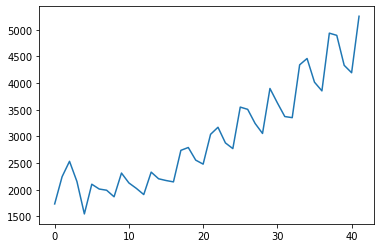

In [111]:
cola1.Sales.plot()

In [112]:
Train = cola1.head(30)
Test = cola1.tail(12)


In [113]:
####################### L I N E A R ##########################
import statsmodels.formula.api as smf 


In [114]:
linear_model = smf.ols('Sales~t',data=Train).fit()

In [115]:
linear_model

In [116]:
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))

In [117]:
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))

In [118]:
rmse_linear


714.0144483818334

In [119]:
##################### Exponential ##############################

Exp = smf.ols('log_Rider~t',data=Train).fit()

In [120]:
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))

In [121]:
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))

In [122]:
rmse_Exp

552.2821039688199

In [126]:
#################### Quadratic ###############################

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()

In [127]:
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))

In [128]:
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))

In [129]:
rmse_Quad

646.2715428656094

In [133]:
################## Testing #######################################

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,714.014448
1,rmse_Exp,552.282104
2,rmse_Quad,646.271543


In [134]:
# so rmse_add_sea has the least value among the models prepared so far 
# Predicting new values 
